### Importación de datos



In [1]:
# Instalar pandas
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd # Importar la libreria de pandas como pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [9]:
import matplotlib.pyplot as plt # Importar libreria matplotlib como plt

#1. Análisis de facturación



In [6]:
# Calcular ingresos totales por tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f'ANALISIS DE FACTURACIÓN')
print(f'--------------------------')
print(f'Ingreso total Tienda 1: ${ingreso_tienda1:,.2f}')
print(f'Ingreso total Tienda 2: ${ingreso_tienda2:,.2f}')
print(f'Ingreso total Tienda 3: ${ingreso_tienda3:,.2f}')
print(f'Ingreso total Tienda 4: ${ingreso_tienda4:,.2f}')

ANALISIS DE FACTURACIÓN
--------------------------
Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


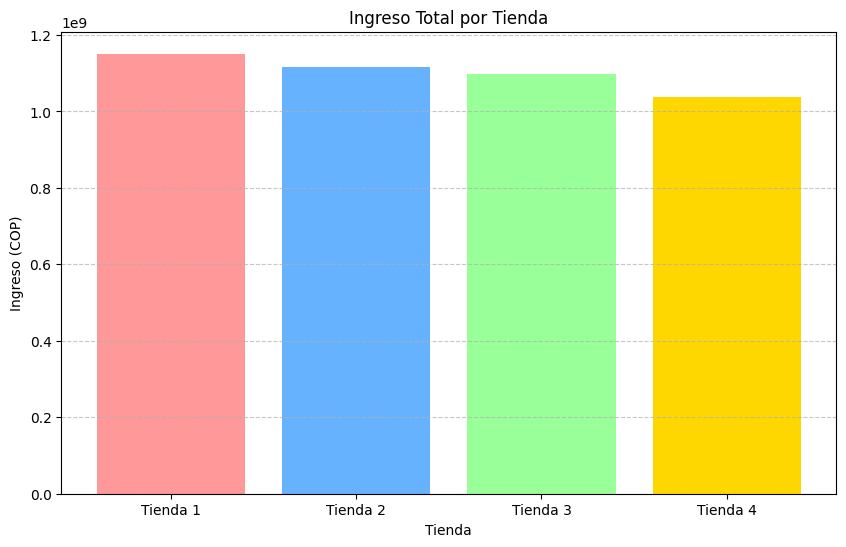

In [10]:
# Datos para gráfico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Crear gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(tiendas, ingresos, color=['#FF9999','#66B2FF','#99FF99','#FFD700'])
plt.title('Ingreso Total por Tienda')
plt.ylabel('Ingreso (COP)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Ventas por categoría

In [7]:
def resumen_por_categoria(df, nombre_tienda):
    # Agrupar por categoría y contar cantidad de productos vendidos
    agrupado = df.groupby("Categoría del Producto").size().reset_index(name='Cantidad')
    # Ordenar por cantidad descendente
    agrupado = agrupado.sort_values(by="Cantidad", ascending=False)
    # Mostrar top 5 categorías
    print(f"\nTop 5 categorías por número de ventas - {nombre_tienda}:")
    print(agrupado.head(5))
    return agrupado

# Aplicar función a cada tienda
categoria_t1 = resumen_por_categoria(tienda, "Tienda 1")
categoria_t2 = resumen_por_categoria(tienda2, "Tienda 2")
categoria_t3 = resumen_por_categoria(tienda3, "Tienda 3")
categoria_t4 = resumen_por_categoria(tienda4, "Tienda 4")


Top 5 categorías por número de ventas - Tienda 1:
  Categoría del Producto  Cantidad
7                Muebles       465
3           Electrónicos       448
5               Juguetes       324
2      Electrodomésticos       312
1   Deportes y diversión       284

Top 5 categorías por número de ventas - Tienda 2:
  Categoría del Producto  Cantidad
7                Muebles       442
3           Electrónicos       422
5               Juguetes       313
2      Electrodomésticos       305
1   Deportes y diversión       275

Top 5 categorías por número de ventas - Tienda 3:
  Categoría del Producto  Cantidad
7                Muebles       499
3           Electrónicos       451
5               Juguetes       315
2      Electrodomésticos       278
1   Deportes y diversión       277

Top 5 categorías por número de ventas - Tienda 4:
  Categoría del Producto  Cantidad
7                Muebles       480
3           Electrónicos       451
5               Juguetes       338
1   Deportes y diversión  

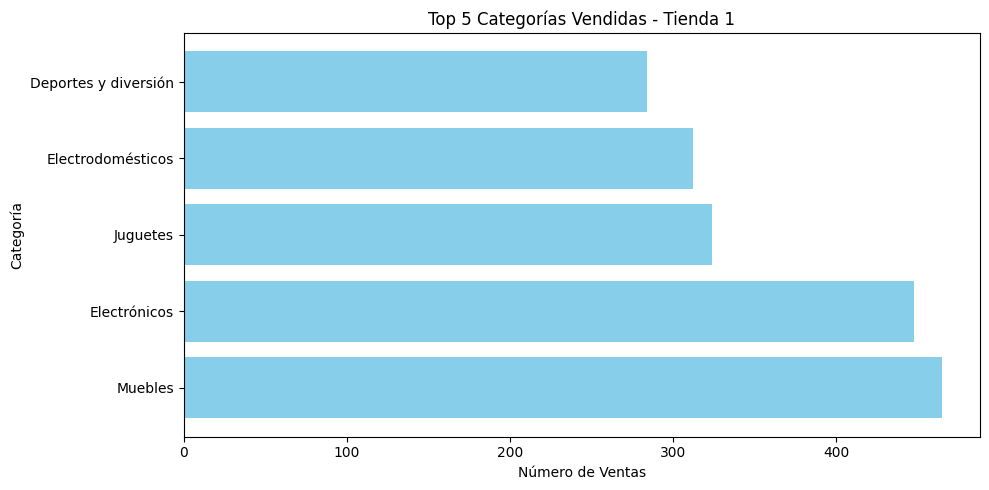

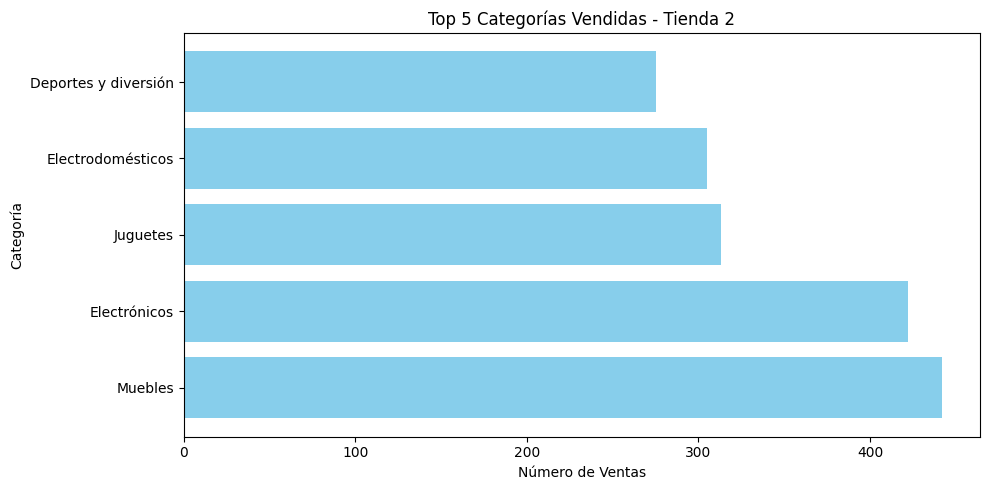

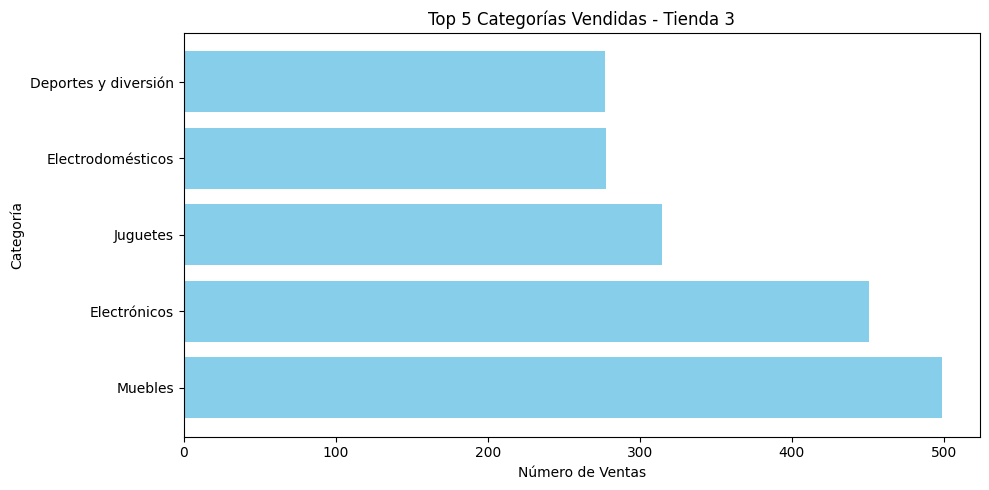

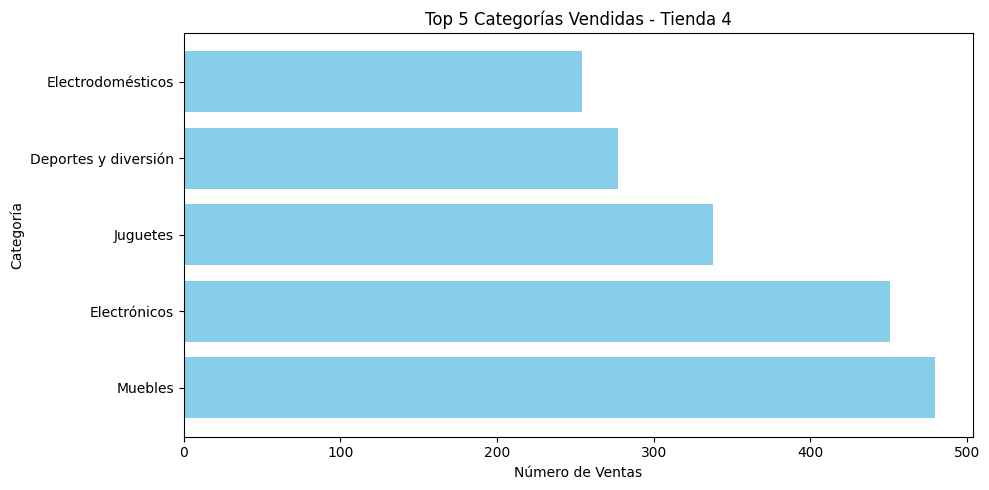

In [11]:
def graficar_top_categorias(df, nombre_tienda):
    top5 = df.head(5)
    plt.figure(figsize=(10, 5))
    plt.barh(top5['Categoría del Producto'], top5['Cantidad'], color='skyblue')
    plt.title(f'Top 5 Categorías Vendidas - {nombre_tienda}')
    plt.xlabel('Número de Ventas')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()

# Graficar para cada tienda
graficar_top_categorias(categoria_t1, "Tienda 1")
graficar_top_categorias(categoria_t2, "Tienda 2")
graficar_top_categorias(categoria_t3, "Tienda 3")
graficar_top_categorias(categoria_t4, "Tienda 4")

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda